In [1]:
import rasterio
from rasterio.plot import show
from rasterstats import zonal_stats
import osmnx as ox
import geopandas as gpd
import os
import matplotlib.pyplot as plt

In [2]:
# File path
data_dir = "L5_data"
dem_fp = os.path.join(data_dir, "Helsinki_DEM2x2m_Mosaic.tif")

# Read the Digital Elevation Model for Helsinki
dem = rasterio.open(dem_fp)
dem

<open DatasetReader name='L5_data/Helsinki_DEM2x2m_Mosaic.tif' mode='r'>

In [3]:
# Keywords for Kallio and Helsinki in such format that they can be found from OSM
kallio_q = "Kallio, Helsinki, Finland"
pihlajamaki_q = "Pihlajamäki, Malmi, Helsinki, Finland"

# Retrieve the geometries of those areas using osmnx
kallio = ox.gdf_from_place(kallio_q)
pihlajamaki = ox.gdf_from_place(pihlajamaki_q)

# Reproject to same coordinate system as the
kallio = kallio.to_crs(crs=dem.crs)
pihlajamaki = pihlajamaki.to_crs(crs=dem.crs)

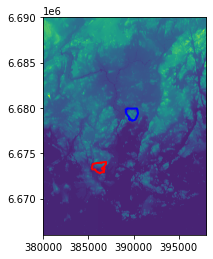

In [4]:
# Plot the Polygons on top of the DEM
ax = kallio.plot(facecolor='None', edgecolor='red', linewidth=2)
ax = pihlajamaki.plot(ax=ax, facecolor='None', edgecolor='blue', linewidth=2)

# Plot DEM
show((dem, 1), ax=ax)

In [5]:
# Read the raster values
array = dem.read(1)

# Get the affine
affine = dem.transform

In [6]:
# Calculate zonal statistics for Kallio
zs_kallio = zonal_stats(kallio, array, affine=affine, stats=['min', 'max', 'mean', 'median', 'majority'])

# Calculate zonal statistics for Pihlajamäki
zs_pihla = zonal_stats(pihlajamaki, array, affine=affine, stats=['min', 'max', 'mean', 'median', 'majority'])

/home/flycher/anaconda3/envs/gis/lib/python3.8/site-packages/rasterstats/io.py:301: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


In [10]:
zs_kallio, zs_pihla

([{'min': -2.1760001182556152,
   'max': 37.388999938964844,
   'mean': 12.72339036708862,
   'median': 11.144500255584717,
   'majority': 0.3490000069141388}],
 [{'min': 8.621999740600586,
   'max': 46.30400085449219,
   'mean': 24.559831516315707,
   'median': 24.177000045776367,
   'majority': 10.41100025177002}])